In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 농어 길이(독립변수 input_data)와 무게(종속변수 target_data)
perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
perch_length.shape, perch_weight.shape

((56,), (56,))

In [4]:
# 독립변수 이차원으로 변환
perch_length = perch_length.reshape(-1,1)
perch_length.shape

(56, 1)

In [17]:
# 훈련/테스트 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42, test_size=0.25)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42, 1), (14, 1), (42,), (14,))

### 모델 훈련하기/평가하기

In [18]:
from sklearn.neighbors import KNeighborsRegressor as knn
knr = knn(n_neighbors=3)

In [78]:
model = knr.fit(train_input, train_target)

In [79]:
train_score = knr.score(train_input,train_target)
test_score = knr.score(test_input,test_target)
print(train_score)
print()
print(test_score)

0.9804899950518966

0.9746459963987609


### 임의의 값 예측하기

In [80]:
## 임의 데이터(길이)로 무게 예측(predict())
# - 임의 데이터 : 50

temp_pred = model.predict([[50]])
temp_pred

array([1033.33333333])

In [81]:
sample = np.array([50])
sample = sample.reshape(-1,1)
temp_pred = model.predict(sample)
temp_pred

array([1033.33333333])

In [82]:
import matplotlib.pyplot as plt

In [86]:
# 임의 데이터(50cm)m와 이웃하는 3개 데이터 : model.kneighbors([[50]])
## dist : 이웃의 거리
## idx : 이웃의 인덱스
# 임의의 데이터와 이웃하는 3개 데이터의 평균값은 약 1033
dist, idx = model.kneighbors([[50]])
print(dist)
print(idx)

[[6. 7. 7.]]
[[34  8 14]]


In [87]:
# 이웃하는 종속변수 값
train_target[idx]

array([[1000., 1000., 1100.]])

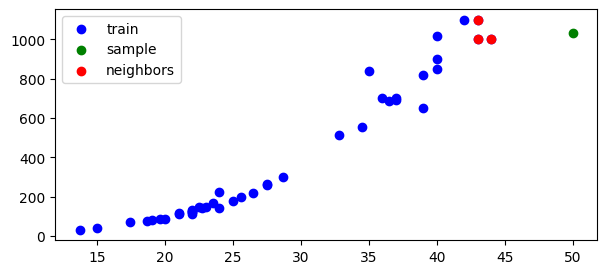

In [88]:
plt.figure(figsize=(7,3))
plt.scatter(train_input, train_target, color = 'blue', label = 'train')
plt.scatter(50,1033, color='green', label='sample')
plt.scatter(train_input[idx],train_target[idx], color='red', label ='neighbors')
# plt.scatter(train_input[idx,0], train_input[idx,1], color = 'red')
plt.legend()
plt.show()

### KNN의 회귀모델 예측은 이웃하는 갯수가 가지고 있는 종속변수 값을
### 평균한 값이 예측값으로 사용됨

In [89]:
# KNN의 회귀모델 예측은 이웃하는 갯수가 가지고 있는 종속변수 값을
# - 평균한 값이 예측값으로 사용됨
np.mean(train_target[[idx]])

C:\Users\세종tp\AppData\Local\Temp\ipykernel_3164\247572177.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.mean(train_target[[idx]])


1033.3333333333333

#### 임의의 값과 이웃하는 데이터와의  <span style="color:red">거리에 상관없이</span> 추출하기 때문에 예측값이 잘 못 나올수 있음 - <span style="color:red"> 분포범위 내 예측은 가능하나 범위밖 예측은 오류가 발생함</span>
### <span style='color:red'>훈련데이터 범위밖의 학습데이터가 들어오면 예측오류 발생</span>

In [90]:
# 농어의 길이가 100일때 무게는
model.predict([[100]])

array([1033.33333333])

In [91]:
dist, idx = model.kneighbors([[100]])
print(dist)
print(idx)

[[56. 57. 57.]]
[[34  8 14]]


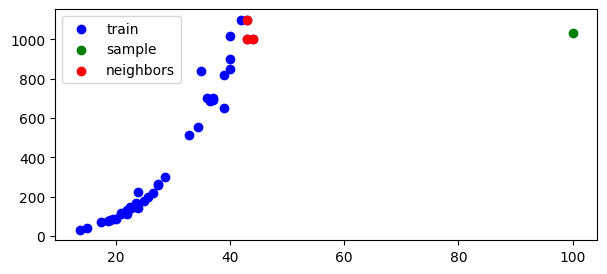

In [92]:
plt.figure(figsize=(7,3))
plt.scatter(train_input, train_target, color = 'blue', label = 'train')
plt.scatter(100,1033, color='green', label='sample')
plt.scatter(train_input[idx],train_target[idx], color='red', label ='neighbors')
# plt.scatter(train_input[idx,0], train_input[idx,1], color = 'red')
plt.legend()
plt.show()

### KNN의 한계
#### - x축(길이)의 크기가 커지더라도 이웃은 가까운것만 체크되기에
#### - target값의 범위를 벗어나는 경우 모델로서 사용이 어려워짐
#### - 다른 모델을 사용해야함

# ---

### 선형회귀(linear regression)모델
#### 선형회귀모델 : 선형회귀(직선), 다항회귀(곡선), 다중회귀 3가지 모델이 있음
#### 다중회귀모델 중 : 특수한 모델로 릿지, 라쏘 모델이 사용됨

### 선형회귀모델
#### - 훈련과정은 항상 동일 : 데이터분류 > 모델생성 > 훈련 > 평가 > 예측
#### - 선형회귀는 비교적 간단하며 성능은 뛰어남
#### - 회귀모델 수행 시 초반에 사용됨(모델 비교를 위해서 사용됨)

### 선형회귀모델의 역할
#### - 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
print(train_input.shape)
print(train_target.shape)

(42, 1)
(42,)


In [58]:
# 모델생성
lr = LinearRegression()

In [93]:
# 훈련하기
lmodel = lr.fit(train_input, train_target)

In [94]:
# 평가하기
print('train score :', lmodel.score(train_input, train_target))
print('test score :', lmodel.score(test_input, test_target))

train score : 0.9398463339976041
test score : 0.824750312331356


In [95]:
# 예측하기
print('50cm : ', lmodel.predict([[50]]))
print('100cm : ', lmodel.predict([[100]]))

50cm :  [1241.83860323]
100cm :  [3192.69585141]


In [96]:
# 모델 알고리즘 확인하기
# 하나의 직선을 그리기 위한 1차 방정식
# - 훈련모델의 수행목적은 기울기와 절편을 스스로 알아내는 것임
# - 스스로 알라낸 기울기와 절편을 이용해서 학습을 수행

# y = a * x + b
# y : 종속변수
# a : 기울기(coef)
# b : 절편 (intercept)
# x : 독립변수(임의 값)
print('coef :', lmodel.coef_)
print('intercept : ', lmodel.intercept_)


coef : [39.01714496]
intercept :  -709.0186449535474


### 추세선 그리기(모델의 절편과 기울기을 이용)
### x값이 0일때 y값(무게)이 마이너스(-)가 나오므로 모델 성능에 문제가 있음

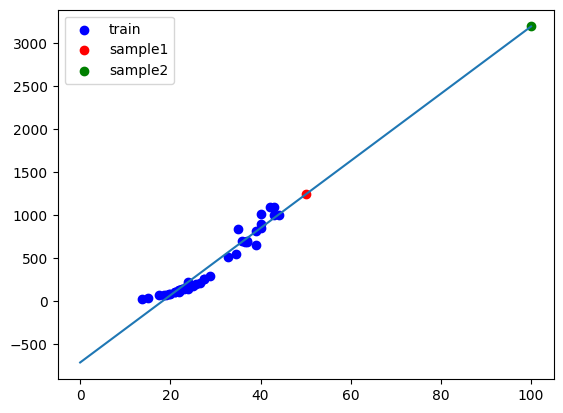

In [97]:
# 절편과 기울기를 그래프로 그리기
plt.scatter(train_input, train_target, color='blue', label ='train')
plt.scatter(50, 1241.83860323, color='red', label ='sample1')
plt.scatter(100, 3192.69585141, color='green', label ='sample2')

# 추세선 그리기(절편과 기울기을 이용)
# - x축의 길이범위를 15~100으로 그리기
# - y축의 길이범위를 15~50으로 그리기

plt.plot([0,100], [lr.coef_ * 0 + lr.intercept_, lr.coef_ * 100 + lr.intercept_])
plt.legend()
plt.show()

### <span style = 'color:red'>다항 회귀모델(곡선)</span>
#### <span style = 'color:red'>(용도) 단일선형회귀(컬럼이 하나)에서 추세가 곡선인 경우 복잡도를 높여 성능을 높이고자 하는 경우</span>
#### y절편의 값이 음수(-)값을 나타내기에 작은 x값을 이용해서 예측할 경우 
#### 음수(-)값을 가지는 무게가 예측될 수 있음
#### 무게는 음수가 나올수 없기에
#### 선형회귀(직선)모델 보다는 다르 모델을 이용해서 훈련할 필요성이 있음
#### 산점도의 분로 중 좌하향에서 중간까지의 분포가 곡선을 나타내기에
#### 곡선을 나타내느 다항회귀모델을 사용을 고려해 볼만함


---
### 2차 방정식 : ax^2 + bx +c
### a와 b : 계수
### c : y절편

In [ ]:
# 다항 회귀
# x값이 2개 이상이 필요
# - 종속변수는 그래도 사용됨

In [98]:
3 **2

9

In [101]:
# numpy.column_stack : 2차원의 데이터형태를 유지하면서 컬럼을 추가할 때 사용하는 함수
np.column_stack((3 ** 2, 3))

array([[9, 3]])

In [103]:
train_poly = np.column_stack((train_input ** 2, train_input ))
test_poly = np.column_stack((test_input ** 2, test_input ))

In [105]:
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [108]:
print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [109]:
# 모델생성
# - 선형회귀, 다항회귀, 다중회귀의 모델은 하나의 모델(클래스)를 사용
# - 사용되는 데이터의 형태에 따라서 선형, 다ㅏ항, 다중회귀로 분류됨
# - 모델(클래스)가 데이터의 형태에 따라서 알아서 훈련시킴
mmodel = LinearRegression()
mmodel

LinearRegression()

In [110]:
# 훈련하기(다항데이터로 훈련)
mmodel.fit(train_poly, train_target)

LinearRegression()

In [112]:
# 평가하기
train_score = mmodel.score(train_poly, train_target)
test_score = mmodel.score(test_poly, test_target)
print('train_score : ', train_score)
print('test_score : ', test_score)

train_score :  0.9706807451768623
test_score :  0.9775935108325122


### 다항회귀모델 테스트평가결과훈련평가결과보다 높게 나타남
#### - 미미한 과소적합을 나타내고 있음


In [115]:
# 예측하기(50cm길이)
mmodel.predict([[50 ** 2, 50]])

array([1573.98423528])

In [116]:
# 모델 방정식 추출하기
print('coef : ', mmodel.coef_)
print('intercept : ', mmodel.intercept_)

coef :  [  1.01433211 -21.55792498]
intercept :  116.0502107827827


In [119]:
### 2차 방정식 : ax^2 + bx +c
mmodel.coef_[0], mmodel.coef_[1]

(1.0143321093767301, -21.557924978837352)

In [120]:
print(50 ** 2)
print(50)

2500
50


In [130]:
# 모델의 계수와 절편을 이용해 임의값(50cm)의 예측값 확인
print((2500 * 1.0143321093767301) + ( 50 *  -21.557924978837352) + 116.0502107827827)

1573.9842352827402


In [137]:
# y 계산값 만들기
ylist = []
for i in range(15,51,1):
    ss = (mmodel.coef_[0] * i) + (mmodel.coef_[1] * i) + mmodel.intercept_
    ylist.append(ss)

ss

-911.1294326902487

In [136]:
point = np.arange(15,51)
point

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50])

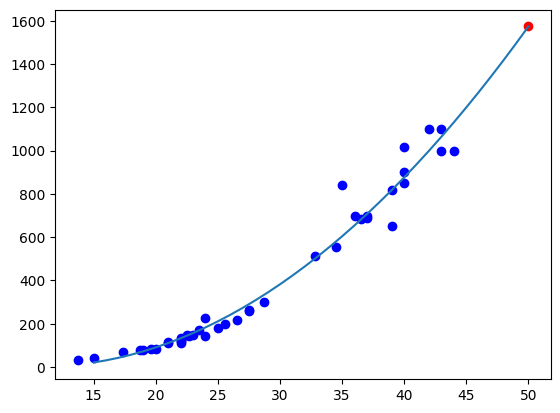

In [138]:
# 예측이 적절한지 시각화
# 훈련데이터 그리기
plt.scatter(train_input, train_target, color='blue', label =' train')

# 50cm 농어 데이터 
plt.scatter(50, 1573.9842352827402, color='red', label =' sample')

# 추세선 그리기
# plt.plot([0,100], [lr.coef_ * 0 + lr.intercept_, lr.coef_ * 100 + lr.intercept_])
point = np.arange(15,51)
a = mmodel.coef_[0]
b = mmodel.coef_[1]
c = mmodel.intercept_
plt.plot(point, (a*point**2)+(b*point)+c)
plt.show()

### 해석
#### - 전체적으로 선형회귀모델보다는 다항외귀모델의 평각결과가 높게 나옴
#### - 그러나 훈련에 대한 평가결과가 테스트 결과보다 낮게 나옴(과소적합 발생)
#### - 큰 차이를 보이지 않는 경우에는 분석가에 따라 그대로 사용하는 경우도 있음
#### - 과소적합을 해소하기 위해서는 데이터를 늘리거나 복잡도를 높이는 방법을 사용

---
### 데이터를 늘리기
#### 데이터가 많고 적음의 의미
#### - 데이터는 행으로 많은경우 많은 데이터라고 알고 있음
#### - 그러나, 컬럼이 많은 경우에도 데이터가 많다고 표현함
#### - 행의 데이터는 한계가 있음
#### - 데이터의 양을 늘려서 복잡도를 높이는 방법중에 특성(칼럼)을 늘리는 경우도 사요됨(이때 사용되는 방법 : 특성공학의 개념이 사용됨)
#### - 독립변수의 갯수(특성의 갯수)를 늘려서 복잡도를 높이는 방법 사용

### 다중회귀모델 : 특성이 많은 경우 사용되는 모델